In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

project = https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/medical-data-visualizer

In [3]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [25]:
df['overweight'] = 0
BMI = df['weight']/((df['height']/100) * (df['height']/100))

In [26]:
df.loc[BMI > 25, 'overweight'] = 1

In [27]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [28]:
#df['cholesterol']=df['cholesterol'].apply(lambda x: 0 if x <= 1 else 1)
#df['gluc']=df['gluc'].apply(lambda x: 0 if x <= 1 else 1)
df2 = df.copy()
df2['cholesterol'].loc[df2['cholesterol'] <= 1] = 0
df2['cholesterol'].loc[df2['cholesterol']>1] = 1

C:\Users\andri\AppData\Local\Temp\ipykernel_12544\3383078614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cholesterol'].loc[df2['cholesterol'] <= 1] = 0
C:\Users\andri\AppData\Local\Temp\ipykernel_12544\3383078614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cholesterol'].loc[df2['cholesterol']>1] = 1


In [30]:
df2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0


In [40]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0


In [62]:
df = df[df['ap_lo'] <= df['ap_hi']]

In [63]:
df.shape[0]

68766

In [33]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars= ['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])
df_cat['total'] = 1
df_cat

,cardio,variable,value
0,0,cholesterol,1
1,1,cholesterol,3
2,1,cholesterol,3
3,1,cholesterol,1
4,0,cholesterol,1
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [35]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()
df_cat.head()

,cardio,variable,value
0,0,active,0
1,0,active,1
2,0,alco,0
3,0,alco,1
4,0,cholesterol,1


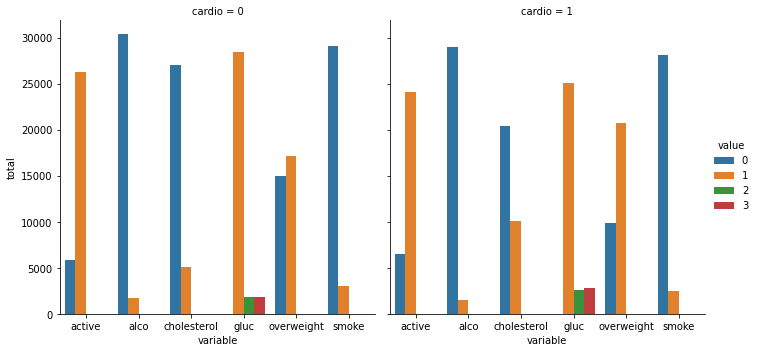

In [75]:
sns.catplot(x='variable', y='total',data =df_cat, hue='value', kind='bar', col='cardio')

In [66]:
df = df[df['height'] >= df['height'].quantile(0.025)]

In [68]:
df = df[df['height'] <= df['height'].quantile(0.975)]

In [69]:
df = df[df['weight'] >= df['weight'].quantile(0.025)]

In [70]:
df = df[df['weight'] <= df['weight'].quantile(0.975)]

<AxesSubplot:>

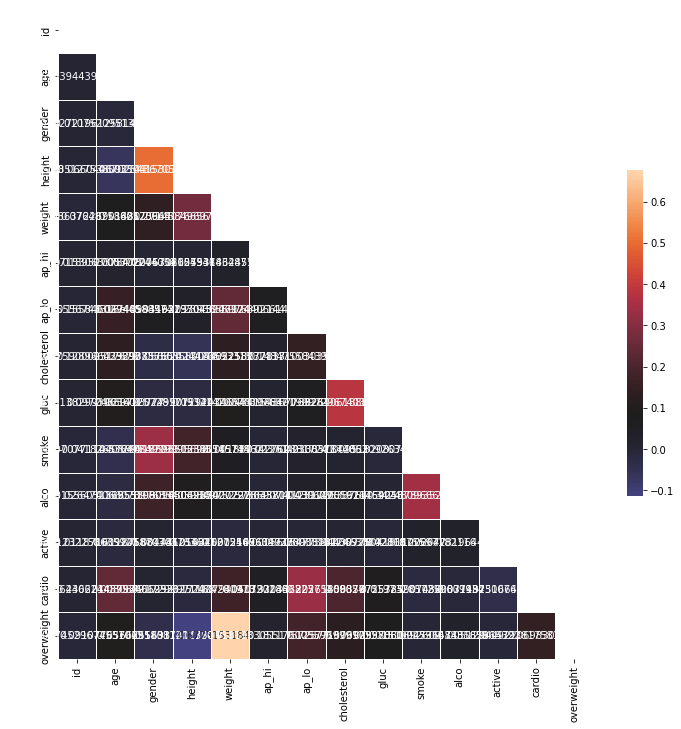

In [81]:
corr = df.corr(method='pearson')
mask = np.triu(corr)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, linewidths=1, annot=True,mask=mask, fmt='1', center=0.08, cbar_kws={'shrink':0.5})